In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from matplotlib.patches import Patch
import os
import seaborn as sns
import brewer2mpl
from collections import namedtuple, defaultdict
DataPoint = namedtuple("DataPoint", "min,mean,median,max,sd")

mpl.rcParams["font.family"] = "Times New Roman"
# plt.rcParams['font.family'] = 'DeJavu Serif'
# plt.rcParams['font.serif'] = ['Times New Roman']
bmap = brewer2mpl.get_map('Set2', 'qualitative', 8)

bmap_len = 7
# fifo = bmap.mpl_colors[bmap_len-0]
# edf = bmap.mpl_colors[bmap_len-2]
# graphene = bmap.mpl_colors[bmap_len-4]
# tetrisched = bmap.mpl_colors[bmap_len-5]
# dagsched = bmap.mpl_colors[bmap_len-6]

viridis = mpl.colormaps.get_cmap('viridis')
colors = viridis(np.linspace(0, 1, 5))
fifo, edf, graphene, dagsched, tetrisched = colors

In [2]:
goodput = {
    "FIFO": {
        0.25: [501, 578, 690],
        0.5:  [630, 618, 581],
        0.75: [350,393,318],
        1:    [180,203,180]
    },
    "EDF": {
        0.25: [713,749,788],
        0.5:  [646,655,624],
        0.75: [387,420,415],
        1:    [235,240,255]
    },
    "TetriSched": {
        0.25: [791,817,848],
        0.5:  [728,705,710],
        0.75: [491,524,491],
        1:    [315,329,328]
    },
    "DAGSched": {
        0.25: [964,969,976],
        0.5:  [927,930,927],
        0.75: [777,806,801],
        1:    [571,589,589]
    }
}

In [6]:
datapoints = {}
for scheduler, hetero_probs_dict in goodput.items():
    datapoints[scheduler] = {}
    for hetero_prob, attainment in hetero_probs_dict.items():
        attainments = np.array(attainment) / 10
        datapoints[scheduler][hetero_prob] = DataPoint(
            min=np.min(attainments),
            median=np.median(attainments),
            max=np.max(attainments),
            mean=np.mean(attainments),
            sd=np.std(attainments, ddof=1),
        )

for scheduler, hetero_probs_dict in datapoints.items():
    print(f"Scheduler: {scheduler}")
    for hetero_prob, datapoint in hetero_probs_dict.items():
        print(f"Hetero Prob: {hetero_prob}, Data: {datapoint}")

Scheduler: FIFO
Hetero Prob: 0.25, Data: DataPoint(min=50.1, mean=58.96666666666667, median=57.8, max=69.0, sd=9.503858865394273)
Hetero Prob: 0.5, Data: DataPoint(min=58.1, mean=60.96666666666667, median=61.8, max=63.0, sd=2.554081700598735)
Hetero Prob: 0.75, Data: DataPoint(min=31.8, mean=35.36666666666667, median=35.0, max=39.3, sd=3.7634204300520717)
Hetero Prob: 1, Data: DataPoint(min=18.0, mean=18.766666666666666, median=18.0, max=20.3, sd=1.3279056191361398)
Scheduler: EDF
Hetero Prob: 0.25, Data: DataPoint(min=71.3, mean=75.0, median=74.9, max=78.8, sd=3.75099986670221)
Hetero Prob: 0.5, Data: DataPoint(min=62.4, mean=64.16666666666667, median=64.6, max=65.5, sd=1.5947831618540915)
Hetero Prob: 0.75, Data: DataPoint(min=38.7, mean=40.733333333333334, median=41.5, max=42.0, sd=1.7785762095938784)
Hetero Prob: 1, Data: DataPoint(min=23.5, mean=24.333333333333332, median=24.0, max=25.5, sd=1.0408329997330663)
Scheduler: TetriSched
Hetero Prob: 0.25, Data: DataPoint(min=79.1, mean

In [7]:
miss_rate_datapoints = {}
for scheduler, hetero_probs_dict in goodput.items():
    miss_rate_datapoints[scheduler] = {}
    for hetero_prob, attainment in hetero_probs_dict.items():
        attainments = 100-(np.array(attainment) / 10)
        miss_rate_datapoints[scheduler][hetero_prob] = DataPoint(
            min=np.min(attainments),
            median=np.median(attainments),
            max=np.max(attainments),
            mean=np.mean(attainments),
            sd=np.std(attainments, ddof=1),
        )

for scheduler, hetero_probs_dict in miss_rate_datapoints.items():
    print(f"Scheduler: {scheduler}")
    for hetero_prob, datapoint in hetero_probs_dict.items():
        print(f"Hetero Prob: {hetero_prob}, Data: {datapoint}")

Scheduler: FIFO
Hetero Prob: 0.25, Data: DataPoint(min=31.0, mean=41.03333333333333, median=42.2, max=49.9, sd=9.503858865394273)
Hetero Prob: 0.5, Data: DataPoint(min=37.0, mean=39.03333333333333, median=38.2, max=41.9, sd=2.554081700598735)
Hetero Prob: 0.75, Data: DataPoint(min=60.7, mean=64.63333333333334, median=65.0, max=68.2, sd=3.763420430052073)
Hetero Prob: 1, Data: DataPoint(min=79.7, mean=81.23333333333333, median=82.0, max=82.0, sd=1.3279056191361376)
Scheduler: EDF
Hetero Prob: 0.25, Data: DataPoint(min=21.200000000000003, mean=25.0, median=25.099999999999994, max=28.700000000000003, sd=3.75099986670221)
Hetero Prob: 0.5, Data: DataPoint(min=34.5, mean=35.833333333333336, median=35.400000000000006, max=37.6, sd=1.5947831618540915)
Hetero Prob: 0.75, Data: DataPoint(min=58.0, mean=59.26666666666667, median=58.5, max=61.3, sd=1.7785762095938784)
Hetero Prob: 1, Data: DataPoint(min=74.5, mean=75.66666666666667, median=76.0, max=76.5, sd=1.0408329997330665)
Scheduler: TetriSc

In [22]:
def plot(datapoint_collection):
    x_axis_points = list(sorted(datapoint_collection["FIFO"].keys()))
    x_axis_points_labels = [x for x in x_axis_points]
    plt.errorbar(x_axis_points_labels, 
                 [datapoint_collection["FIFO"][x].mean for x in x_axis_points], 
                 yerr=[datapoint_collection["FIFO"][x].sd  for x in x_axis_points], 
                 marker='x', label="FIFO", color=fifo, capsize=4)
    plt.errorbar(x_axis_points_labels, 
                 [datapoint_collection["EDF"][x].mean for x in x_axis_points], 
                 yerr=[datapoint_collection["EDF"][x].sd  for x in x_axis_points], 
                 marker='o', label="EDF", color=edf, capsize=4)
    plt.errorbar(x_axis_points_labels, 
                 [datapoint_collection["TetriSched"][x].mean for x in x_axis_points], 
                 yerr=[datapoint_collection["TetriSched"][x].sd  for x in x_axis_points], 
                 marker='s', label="TetriSched", color=tetrisched, capsize=4)
    plt.errorbar(x_axis_points_labels, 
                 [datapoint_collection["DAGSched"][x].mean for x in x_axis_points], 
                 yerr=[datapoint_collection["DAGSched"][x].sd  for x in x_axis_points], 
                 marker='.', label="DSched", color=dagsched, capsize=4)

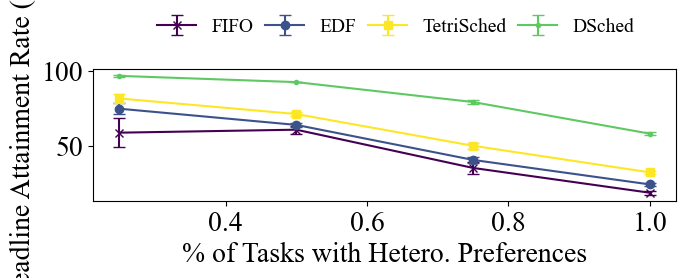

In [51]:
fig = plt.figure(figsize=(7,3))

plot(datapoints)
# plt.legend(fontsize=15, frameon=False,)
# plt.axhline(y=90, color='r', linestyle=':', linewidth=2)

plt.xlabel("% of Tasks with Hetero. Preferences", fontsize=20)
plt.ylabel("Deadline Attainment Rate (%)", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend(fontsize=14,ncol=5, columnspacing=0.6, frameon=False, bbox_to_anchor=(0.08, 1.12))
plt.tight_layout()
# plt.savefig("ddl_attainment_vs_hetero_prob.pdf", dpi=300, pad_inches=0)

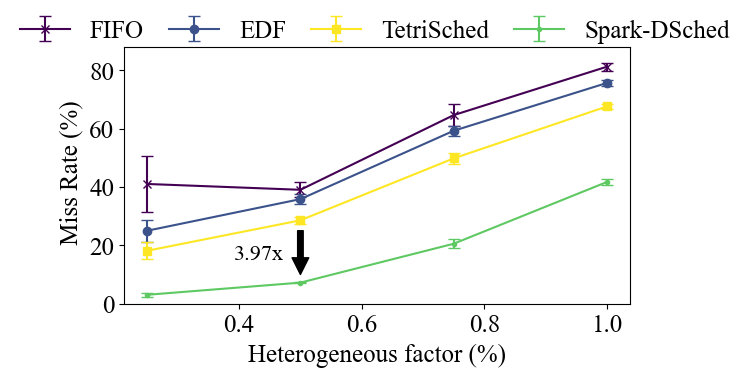

In [124]:
fig = plt.figure(figsize=(6,3.5))

plot(miss_rate_datapoints)
# plt.legend(fontsize=15, frameon=False,)
plt.xlabel("Heterogeneous factor (%)", fontsize=18)
plt.ylabel(" Miss Rate (%)", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)
# plt.yscale("log")
plt.ylim(0,88)
# plt.axhline(y=10, color='r', linestyle=':', linewidth=2)
# plt.legend(fontsize=18,  frameon=False,ncol=2, columnspacing=0.1)

# Annotations
plt.annotate('', xy=(0.5, (100-90)), xytext=(0.5, (100-75)),
             arrowprops=dict(facecolor='black', shrink=0.0001))
plt.text(0.39, (100-85), "3.97x", color='black', fontsize=16, rotation="horizontal")


lines_labels = [fig.axes[0].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, fontsize=18, frameon=False,ncol=4, loc="upper center", bbox_to_anchor=(0.55, 1.1),columnspacing=1)
# plt.legend(bbox_to_anchor=(0, 1.55), loc='upper left', fontsize=12,ncol=5, columnspacing=0.6, frameon=False,)

plt.tight_layout()
plt.savefig("ddl_miss_vs_hetero_prob.pdf", dpi=300, pad_inches=0, bbox_inches="tight")

In [29]:
factor_improvement = defaultdict(dict)
for scheduler, hetero_prob_goodputs in datapoints.items():
    for hetero_prob, attainments in hetero_prob_goodputs.items():
        dagsched_attainments = np.array(datapoints["DAGSched"][hetero_prob])
        scheduler_gap = dagsched_attainments / np.array(attainments)
        factor_improvement[scheduler][hetero_prob] = DataPoint(min=np.min(scheduler_gap), mean=np.mean(scheduler_gap), median=np.median(scheduler_gap), max=np.max(scheduler_gap), sd=np.std(scheduler_gap, ddof=1))
factor_improvement

defaultdict(dict,
            {'FIFO': {0.25: DataPoint(min=0.06342385612742983, mean=1.344594155402429, median=1.6444318824194457, max=1.9241516966067864, sd=0.7386160576641049),
              0.5: DataPoint(min=0.06781501183626305, mean=1.232334738534761, median=1.5000000000000002, max=1.5955249569707401, sd=0.6525167839970178),
              0.75: DataPoint(min=0.41193080143754846, mean=1.8883451787384384, median=2.24693685202639, max=2.4433962264150946, sd=0.8371187382041272),
              1: DataPoint(min=0.7826086956521724, mean=2.6470205817331545, median=3.106571936056839, max=3.272222222222222, sd=1.0510330008065274)},
             'EDF': {0.25: DataPoint(min=0.1606961873512694, mean=1.0675844767308855, median=1.2928888888888888, max=1.3520336605890604, sd=0.5085514537730369),
              0.5: DataPoint(min=0.10860729213839845, mean=1.1790499659634404, median=1.4349845201238391, max=1.4855769230769231, sd=0.5988905038077784),
              0.75: DataPoint(min=0.8716347298110

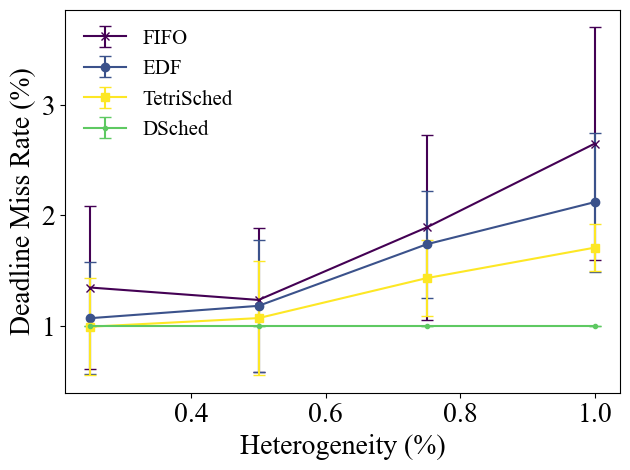

In [35]:
fig = plt.figure(figsize=(6.4,4.8))
plot(factor_improvement)
plt.legend(fontsize=15, frameon=False,)
plt.xlabel("Heterogeneity (%)", fontsize=20)
plt.ylabel("Deadline Miss Rate (%)", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
# plt.yscale("log")
# plt.axhline(y=10, color='r', linestyle=':', linewidth=2)
plt.tight_layout()